# Imports

In [149]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [150]:
########## Imports ##########
import pandas as pd
import numpy as np
import os
from glob import glob
import time
import pickle
from packages import fonctions

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline 
# vérifier si vraiment utile

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

# tensorflow
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers.legacy import Adam

#pip install plot-keras-history
from plot_keras_history import show_history, plot_history

os.environ['TF_KERAS'] = '1'
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [151]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [152]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
#sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [153]:
########## Consignes ##########

# Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
# - un algorithme de type SIFT / ORB / SURF
# - un algorithme de type CNN Transfer Learning.
# Concernant l’approche de type SIFT, je t’invite à regarder le webinaire que nous avons réalisé, disponible dans les ressources

In [154]:
########## Cours ##########

# Une image numérique est caractérisée par sa définition et sa résolution
# Définition = hauteur × largeur (en pixels)
# Résolution = nombre de pixels par unité de longueur de l'image analogique. Elle permet de mesurer la qualité de l'image obtenue après numérisation : plus la résolution est élevée, meilleure est la qualité de l'image

# 1 mégapixel = 1 million de pixels
# -> = définition (donc taille, pas forcément qualité)

In [155]:
########## Formats de fichiers ##########
# -> compression de l'image

# formats de compression sans perte de données -> PNG, TIFF...
# formats de compression avec perte de données -> JPEG

# Préparation des données

In [156]:
# Modifier import pour prendre csv issu de la data exploration (données nettoyées et préparées)

In [157]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [158]:
# Dictionnaire des catégories (pour réduire le nombre de catégories - cf notebook Data_exploration_EDA)
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools', 'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

In [159]:
# Extraire catégories de la feature 'product_category_tree' et réduire nombre de catégories en utilisant le dictionnaire ci dessus
df['category'] = df.apply(fonctions.get_category, axis = 1)
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)
df['category_4'].value_counts()

Baby and Personal Care          300
Electronics and Accessories     292
Home and Kitchen Essential      263
Festive and Special Occasion    151
Name: category_4, dtype: int64

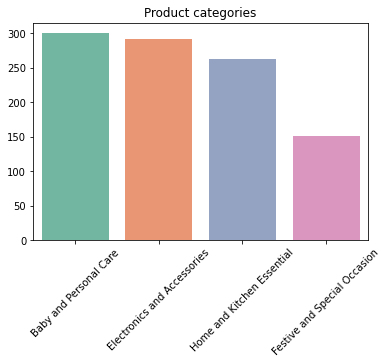

In [160]:
# Barplot

product_categories = df['category_4'].value_counts()

plt.figure()
sns.barplot(x = product_categories.index, y = product_categories.values)
plt.title('Product categories')
plt.xticks(rotation = 45)
plt.show()

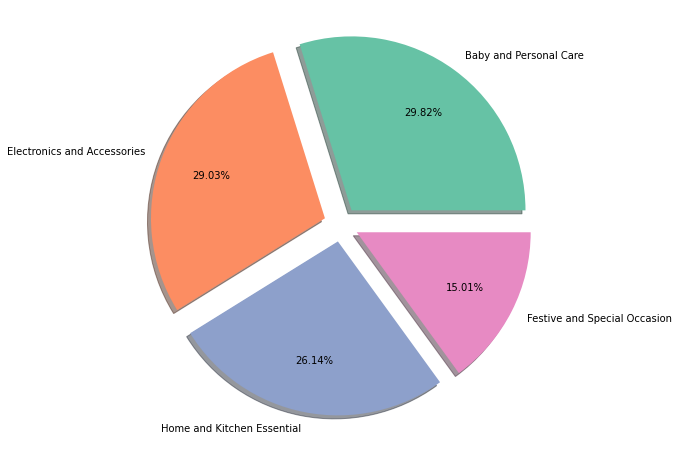

In [161]:
# Camembert
plt.figure(figsize = (8, 8))
plt.pie(
    x = df['category_4'].value_counts().values,
    labels = df['category_4'].value_counts().index,
    explode = [0.1, 0.1, 0.1, 0.1],
    autopct = lambda x: str(round(x, 2)) + '%',
    pctdistance = 0.7,
    shadow = True
    )
plt.show()

In [162]:
df['category_4'].unique()

array(['Home and Kitchen Essential', 'Baby and Personal Care',
       'Electronics and Accessories', 'Festive and Special Occasion', nan],
      dtype=object)

In [163]:
df = df[['category_4', 'description', 'image']]
df.columns = ['category', 'description', 'image']
df.shape

(1050, 3)

In [164]:
df

,category,description,image
0,Home and Kitchen Essential,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby and Personal Care,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby and Personal Care,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home and Kitchen Essential,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home and Kitchen Essential,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...
1045,Baby and Personal Care,Oren Empower Extra Large Self Adhesive Sticker...,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Baby and Personal Care,Wallmantra Large Vinyl Sticker Sticker (Pack o...,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Baby and Personal Care,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,5912e037d12774bb73a2048f35a00009.jpg
1048,Baby and Personal Care,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


In [165]:
df['category'].unique().tolist()

['Home and Kitchen Essential',
 'Baby and Personal Care',
 'Electronics and Accessories',
 'Festive and Special Occasion',
 nan]

In [166]:
# Chemin des images

#path_train = '../../data/Images/train/'
#path_test = '../../data/Images/test/'

path = '../../data/Images/'

data_path = glob(path + '**.jp*')
#data_path_test = glob(path_test + '**.jp*')

In [167]:
data = fonctions.data_fct(df, data_path)
#data_test = fonctions.data_fct(df, data_path_test)

1050


In [168]:
# Encoding des labels

le = preprocessing.LabelEncoder()
le.fit(data['label_name'])
data['label'] = le.transform(data['label_name'])
#data_test['label'] = le.transform(data_test['label_name'])
data.head(5)

,image_path,label_name,image_name,label
0,../../data/Images/aa68675f50a0551b8dadb954017a...,Home and Kitchen Essential,55b85ea15a1536d46b7190ad6fff8ce7.jpg,3
1,../../data/Images/037c2402fee39fbc80433935711d...,Baby and Personal Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0
2,../../data/Images/42643c1c9403f67921a18654bcf4...,Baby and Personal Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0
3,../../data/Images/53f4bc7d7321f5c41de6b86e41f1...,Home and Kitchen Essential,d4684dcdc759dd9cdf41504698d737d8.jpg,3
4,../../data/Images/b144a363c107c7bdd91f32d6e28b...,Home and Kitchen Essential,6325b6870c54cd47be6ebfbffa620ec7.jpg,3


In [169]:
# créer une copie pour plus tard
df_image = data.copy()

# Supprimer colonne image de data
data.drop(['image_name'], axis = 1, inplace = True)

In [170]:
# Nombre d'images par catégorie
data.groupby('label').count()

,image_path,label_name
label,,
0,300,300
1,292,292
2,151,151
3,263,263
4,44,0


In [171]:
########## Gestion des données manquantes ##########
# quelques images non catégorisées -> données manquantes
# Isolation des données manquantes dans un df à part pour traitement ultérieur
df_nan = data.loc[data['label_name'].isna()]
df_nan

,image_path,label_name,label
52,../../data/Images/8f41c6931b5220c2bb34d1cab21c...,NaN,4
86,../../data/Images/170fdf050c7a1f8d30ef5a98c421...,NaN,4
87,../../data/Images/f9a8320c182841024f47ebcba284...,NaN,4
115,../../data/Images/cf2ba696547459733c6bbfad4e3b...,NaN,4
234,../../data/Images/52877a6306aef18af67ab54c8233...,NaN,4
238,../../data/Images/f01140c02fd09e5c56312a64fa8d...,NaN,4
240,../../data/Images/de911421573d3e234450040374b5...,NaN,4
241,../../data/Images/ae03731c3482a5e42d040dbf723c...,NaN,4
242,../../data/Images/63523a600ab69f276664d0eade9d...,NaN,4
243,../../data/Images/32cf0691248297655e2c1728b12e...,NaN,4


In [172]:
df_nan.reset_index(drop = True, inplace = True)

In [173]:
df_nan.shape

(44, 3)

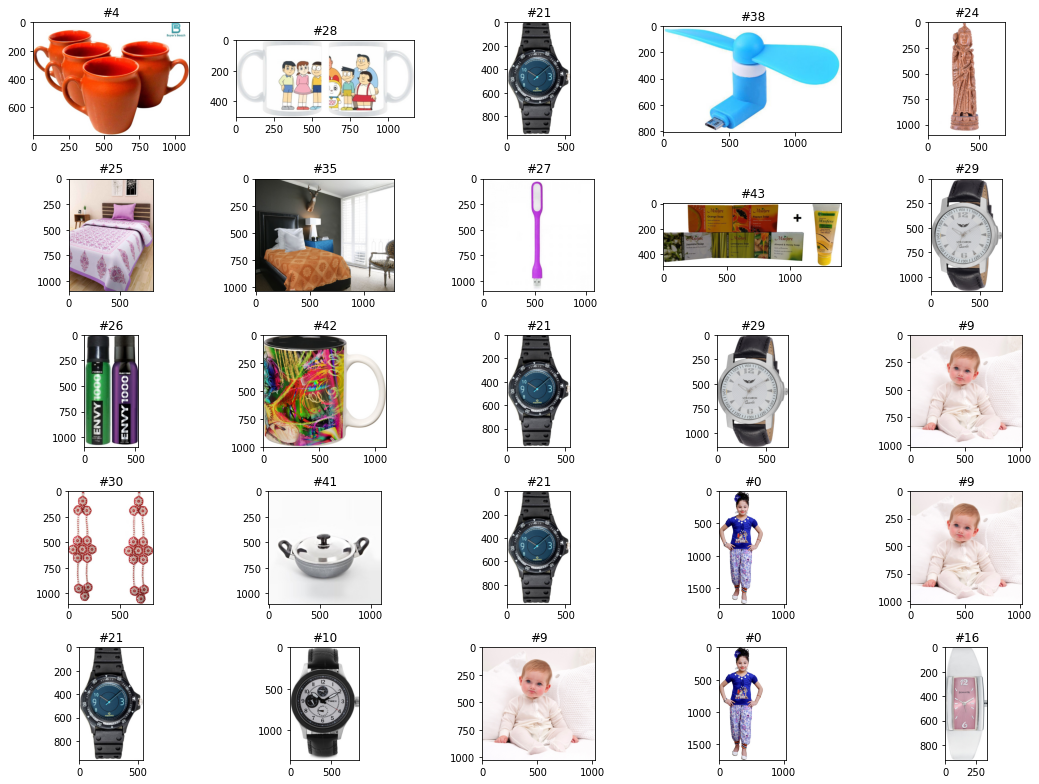

In [174]:
# Visualiser quelques images non catégorisées :

# plot 25 images au hasard
plt.figure(figsize = (15, 11))

for i in range(0, 25):
    plt.subplot(5, 5, 1 + i)
    x = int(np.random.randint(0, 44, 1))
    image = imread(df_nan['image_path'][x])
    plt.title(f'#{x}')
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [175]:
# deux solutions :
# - 1) labelliser manuellement les images
# - 2) les exclures de l'analyse et le reprendre à la fin pour tester algo de classification

# choix de la 2ème option et drop nan ici
data.dropna(inplace = True)

In [176]:
# Vérifier que les données ont bien été supprimées
data.loc[data['label_name'].isna()]

,image_path,label_name,label


In [177]:
# Re-initialisation de l'index après suppression des données manquantes
data.reset_index(drop = True, inplace = True)

Home and Kitchen Essential


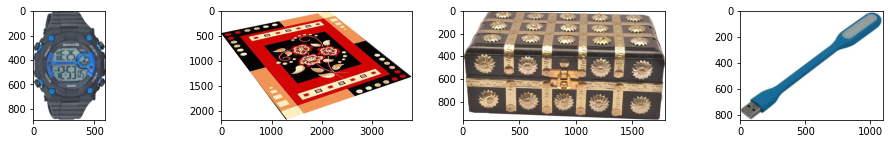

Baby and Personal Care


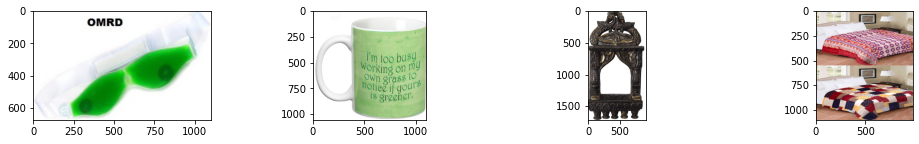

Electronics and Accessories


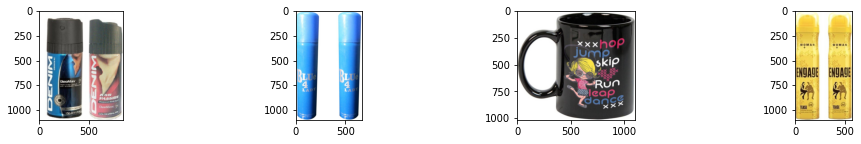

Festive and Special Occasion


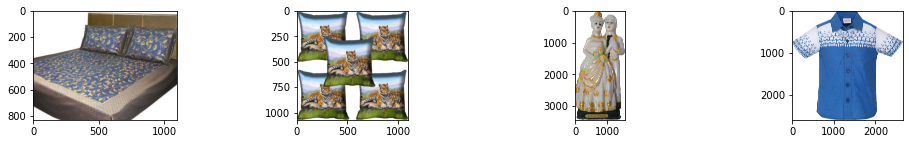

In [178]:
# Visualisation des images de chaque catégorie
list_labels = data['label_name'].unique().tolist()

for name in list_labels:
    print(name)
    plt.figure(figsize = (17, 2))
    for i in range(len(list_labels)):
        plt.subplot(140 + 1 + i)
        filename = fonctions.list_fct(data, name)[i + 10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

In [179]:
# Note -> mug mal catégorisé, parrure de lit aussi...
# Remise en cause de la classification par défaut des produits

# Proposer une catégorisation alternative ?

In [180]:
# test avec librairie Pillow

from PIL import Image

# Charger l'image
#img = Image.open('../data/Images/009099b1f6e1e8f893ec29a7023153c4.jpg')

# Afficher l'image chargée dans une autre fenêtre
#img.show()

# -> va ouvrir l'image dans une autre fenêtre

In [181]:
# Récupérer et afficher la taille de l'image en pixels
"""
w, h = img.size
print('Largeur : {} px, hauteur : {} px'.format(w, h))

# Afficher son mode de quantification
print('Format des pixels : {}'.format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20, 100))
print('Valeur du pixel situé en (20, 100) : {}'.format(px_value))"""

"\nw, h = img.size\nprint('Largeur : {} px, hauteur : {} px'.format(w, h))\n\n# Afficher son mode de quantification\nprint('Format des pixels : {}'.format(img.mode))\n\n# Récupérer et afficher la valeur du pixel à une position précise\npx_value = img.getpixel((20, 100))\nprint('Valeur du pixel situé en (20, 100) : {}'.format(px_value))"

In [182]:
"""# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)

# Afficher la taille de la matrice de pixels
print('Taille de la matrice de pixels : {}'.format(mat.shape))"""

"# Récupérer les valeurs de tous les pixels sous forme d'une matrice\nmat = np.array(img)\n\n# Afficher la taille de la matrice de pixels\nprint('Taille de la matrice de pixels : {}'.format(mat.shape))"

In [183]:
"""##### Histogramme #####

# Charger l'image comme matrice de pixels
img = np.array(Image.open('../data/Images/009099b1f6e1e8f893ec29a7023153c4.jpg'))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins = range(256))
plt.tight_layout()
plt.show()"""

"##### Histogramme #####\n\n# Charger l'image comme matrice de pixels\nimg = np.array(Image.open('../data/Images/009099b1f6e1e8f893ec29a7023153c4.jpg'))\n\n# Générer et afficher l'histogramme\n# Pour le normaliser : argument density=True dans plt.hist\n# Pour avoir l'histogramme cumulé : argument cumulative=True\nn, bins, patches = plt.hist(img.flatten(), bins = range(256))\nplt.tight_layout()\nplt.show()"

In [184]:
# note -> lien "documentation" du cours -> erreur 404
# voir cours -> transformation d'images, extraction de features (bords, etc...)

# Etape 1 : étude de faisabilité

In [185]:
## Création du modèle pré-entraîné

# Modèle VGG16
# pourquoi ? on fait quoi ici ?? expliquer un peu

base_model = VGG16()
model = Model(inputs = base_model.inputs, outputs = base_model.layers[-2].output)

print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [186]:
## Création des features des images

images_features = []
i = 0 
for image_file in data['image_path']:
    if i % 100 == 0:
        print(i)
    i +=1
    image = load_img(image_file, target_size = (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose = 0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0


2024-03-09 13:28:53.218984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100
200
300
400
500
600
700
800
900
1000


(1006, 4096)

## Réduction dimension et analyse

In [187]:
### Réduction de dimension PCA

print(images_features.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(1006, 4096)
(1006, 776)


In [188]:
### Réduction de dimension T-SNE et affichage des images selon vraies classes

temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time() - temps1
print('temps de T-SNE : ', '%15.2f' % duration1, 'secondes')

temps de T-SNE :             4.36 secondes


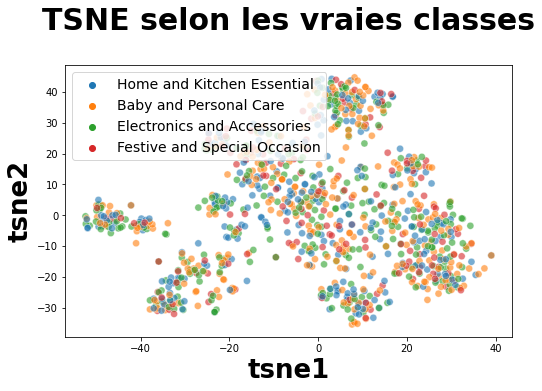

In [189]:
df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne['class'] = data['label_name']

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'class',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14})
plt.show()

In [190]:
# A MODIFIER en mettant légende sur le côté

In [191]:
### Création de clusters à partir du T-SNE et affichage des images selon clusters

cls = cluster.KMeans(n_clusters = 4, n_init = 100)
cls.fit(X_tsne)

KMeans(n_clusters=4, n_init=100)

In [192]:
df_tsne['cluster'] = cls.labels_
df_tsne

,tsne1,tsne2,class,cluster
0,0.152830,4.255170,Home and Kitchen Essential,3
1,37.425400,-17.186213,Baby and Personal Care,1
2,25.482332,-8.624081,Baby and Personal Care,1
3,21.559294,13.635968,Home and Kitchen Essential,0
4,12.687223,38.404747,Home and Kitchen Essential,0
...,...,...,...,...
1001,27.091467,-25.364323,Baby and Personal Care,1
1002,6.016306,-17.210251,Baby and Personal Care,1
1003,13.477935,15.820957,Baby and Personal Care,0
1004,26.333012,0.456604,Baby and Personal Care,1


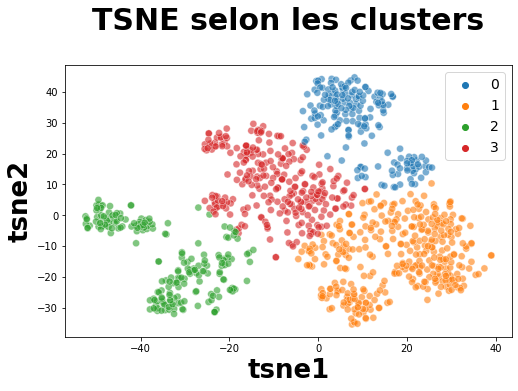

In [193]:
# Visualisation du TSNE selon les clusters définis

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'cluster',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 
plt.show()

In [194]:
# Calcul de l'ARI score

labels = data['label']
print('ARI : ', metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  -0.001745351639137025


In [195]:
# Commenter l'ari score

In [196]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"
# hein ?????

list_shine_0 = [i for i in range(len(data['image_path'])) \
                if (data.iloc[i]['label_name'] == 'Baby and Personal Care') and (df_tsne.iloc[i]['cluster'] == 3)]
list_shine_0[0]

40

tsne1                         14.004534
tsne2                         39.649834
class      Festive and Special Occasion
cluster                               0
Name: 220, dtype: object


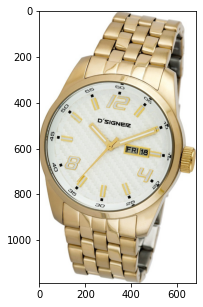

In [197]:
# Affichage image "shine" considérée comme "cloudy"
id = 220 ### A VERIFIER
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data['image_path'][id]
image = imread(filename)
plt.imshow(image)
plt.show()

### Analyse par classes

In [198]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 56 107  63  74]
 [ 49 102  66  75]
 [ 29  51  23  48]
 [ 46  91  52  74]]


In [199]:
cls_labels_transform = fonctions.conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)

Correspondance des clusters :  [0 0 1 1]
[[163 137   0   0]
 [151 141   0   0]
 [ 80  71   0   0]
 [137 126   0   0]]


In [200]:
print(metrics.classification_report(labels, cls_labels_transform))

              precision    recall  f1-score   support

           0       0.31      0.54      0.39       300
           1       0.30      0.48      0.37       292
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       263

    accuracy                           0.30      1006
   macro avg       0.15      0.26      0.19      1006
weighted avg       0.18      0.30      0.22      1006



In [201]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,163,137,0,0
Baby and Personal Care,151,141,0,0
Electronics and Accessories,80,71,0,0
Festive and Special Occasion,137,126,0,0


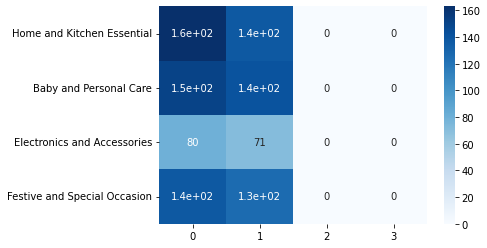

In [202]:
# modifier format annotations
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

In [203]:
# Exporter données (format pickle)

# Export données 'propres' au format pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, '../../data/data')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(data, f)

In [204]:
# specifier le chemin choisi
filepath = os.path.join(path, '../../data/df_image')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df_image, f)